# <b> <center style="background-color:DodgerBlue;">Feature transformation technique with DL model</center> </b>


#### -*- coding: utf-8 -*-
#### Indentation: Jupyter Notebook

__version__='1.0.0'
__author__="Sourav Raj"
__email__="souravraj.iitbbs@gmail.com"

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ANN
import keras 
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Activation, Flatten, Dropout, Input
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed
tf.random.set_seed(42)

### Import data

In [3]:
# If running on google colab other wise skip this cell code
from google.colab import files
import io
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['feature Transforamtion with DL.csv']))

Saving data2_1.0_5.csv to data2_1.0_5.csv


In [4]:
data=pd.read_csv('../../data/feature Transforamtion with DL.csv')
data.columns=['feature1', 'feature2', 'class']
print(data.shape)
data.head(2)

(498, 3)


feature1  feature2  class
0  0.224371  0.028460      0
1  0.284088  0.054416      0

### Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  498 non-null    float64
 1   feature2  498 non-null    float64
 2   class     498 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [6]:
data.describe()

feature1      feature2       class
count  498.000000  4.980000e+02  498.000000
mean    -0.000528  1.270753e-02    0.502008
std      6.477553  6.400034e+00    0.500499
min    -15.807963 -1.407123e+01    0.000000
25%     -3.930364 -4.177892e+00    0.000000
50%      0.023080  5.804950e-13    1.000000
75%      4.001632  4.114817e+00    1.000000
max     15.607963  1.427091e+01    1.000000

In [7]:
data.isnull().sum()
# No Missing value is there

feature1    0
feature2    0
class       0
dtype: int64

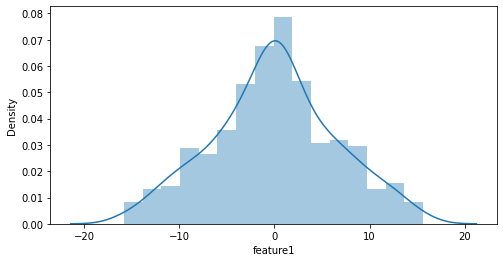

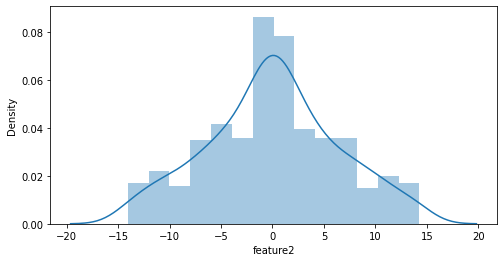

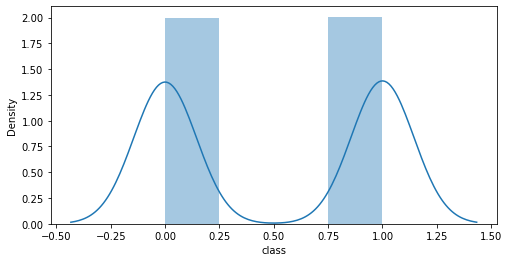

In [8]:
for col in ['feature1', 'feature2', 'class']:
    fig, ax = plt.subplots(1,1, figsize=(8, 4))
    sns.distplot(data[col])

Distribution of features are normally distributed.

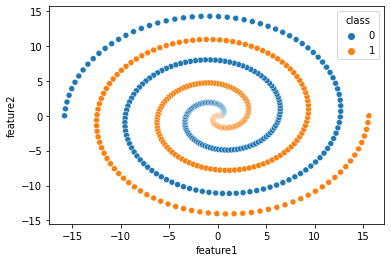

In [9]:
sns.scatterplot(x='feature1', y='feature2', hue='class', data=data)

As data is non linear in nature, we have to go for deep learning models or non linear ML model

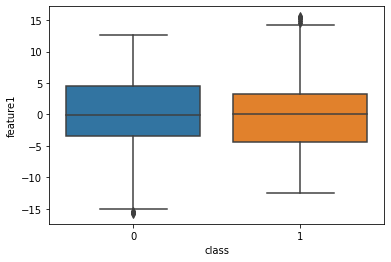

In [10]:
sns.boxplot(x='class', y='feature1', data=data)

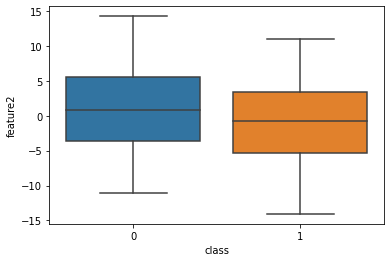

In [11]:
sns.boxplot(x='class', y='feature2', data=data)

## Data Preprocessing

Splitting the data into two parts 70% for training and 30% for validation

In [12]:
Predictor=data.loc[:,['feature1', 'feature2']].values
Target=data.loc[:,'class'].values

X_train, X_test, y_train, y_test = train_test_split(Predictor, Target, test_size=0.3, random_state=42, stratify=Target)


Scaling

In [13]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building and Evaluation

<b> learning rate: </b> The range of values to consider for the learning rate should be between 10^-6 to 1. A traditional default value for the learning rate is 0.1 or 0.01 which is a good starting point for any problem and this can be further optimize with Hyper parameter tuning. In this problem after several iteration & testing we are taking 0.009 as starting point as its convergence is faster. 

<b> activation function: </b> As this problem is binary classification problem, we choose sigmoid in the output layer and relu in the hidden layer as its performance/convergence is better and doesn't have exploding/vanishing gradient problem. In addition we can also choose hidden layer activation function using hyper parameter tuning.

<b> loss function: </b> Binary crossentropy is used as a loss function for this problem as we have binary class at the target variable.

<b> optimizer: </b> Adam optimizer is used which generally prefer over others nowadays.

In addition variable learning rate with factor of 0.7 is used if val_loss is not improving for 20 consecutive patience. 

Early Stopping criteria is used if val_loss is not improving for 50 patience. 

Dropout layer of 0.1 is also added to avoid overfitting in the model

### Model building with Single Hidden Layer

In [31]:
def create_single_hidden_layer_ann_model(input_dim:int, node_in_hidden_layer:int, \
                                         checkpoint_enable:bool=False, checkpoint_dir:str=''):

    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Input(input_dim))
    # The Hidden Layer :
    NN_model.add(Dense(node_in_hidden_layer,activation='relu', activity_regularizer=tf.keras.regularizers.L1(0.001)))
    # NN_model.add(Dropout(rate=0.1))
    # The Output Layer :
    NN_model.add(Dense(1, activation='sigmoid'))
    
    print(NN_model.summary())
    adam=Adam(learning_rate=0.009)
#     sgd=SGD(lr=0.001, momentum=0.9)
    # Compile the network :
    NN_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Define a checkpoint
    if checkpoint_enable:
        checkpoint_name = checkpoint_dir+'/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
        checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
        callbacks_list = [checkpoint]
    else: callbacks_list =None
    return NN_model, callbacks_list
    

Model is created with each node from the given list (4,8,12,16) in single hidden layer 

>>>>>>>>>>>>>>>>>>>> Model training with single layer and 4 node>>>>>>>>>>>>>>>>



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 4)                 12        
                                                                 
 dense_80 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 4s - loss: 0.7035 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.72866, saving model to tmp/Weights-001--0.72866.hdf5
11/11 [==============================] - 1s 21ms/step - loss: 0.7211 - accuracy: 0.4856 - val_loss: 0.7287 - val_accuracy: 0.3800 - lr: 0.0090
Epoch 2/1000
 1/11 [=>.........

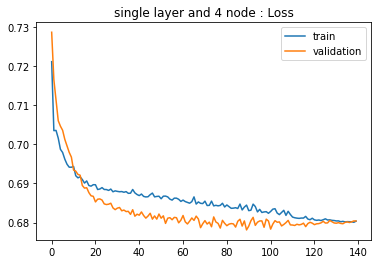

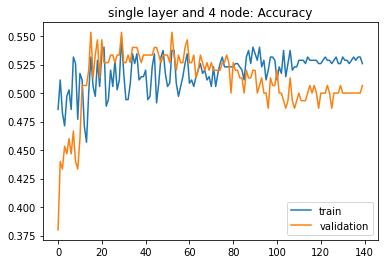

>>>>>>>>>>>>>>>>>>>> Model training with single layer and 8 node>>>>>>>>>>>>>>>>



Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 8)                 24        
                                                                 
 dense_82 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 4s - loss: 0.6977 - accuracy: 0.4062
Epoch 1: val_loss improved from inf to 0.68869, saving model to tmp/Weights-001--0.68869.hdf5
11/11 [==============================] - 1s 22ms/step - loss: 0.6947 - accuracy: 0.4713 - val_loss: 0.6887 - val_accuracy: 0.5333 - lr: 0.0090
Epoch 2/1000
 1/11 [=>.........

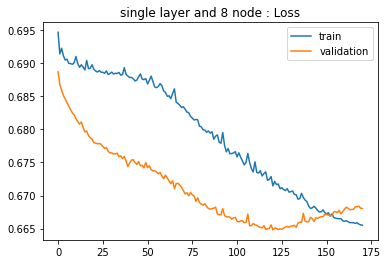

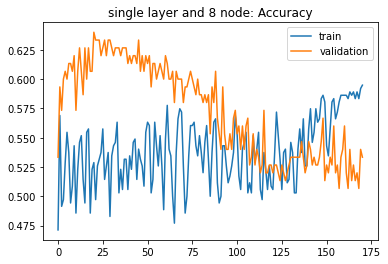

>>>>>>>>>>>>>>>>>>>> Model training with single layer and 12 node>>>>>>>>>>>>>>>>



Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 12)                36        
                                                                 
 dense_84 (Dense)            (None, 1)                 13        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 4s - loss: 0.7006 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 0.69642, saving model to tmp/Weights-001--0.69642.hdf5
11/11 [==============================] - 1s 21ms/step - loss: 0.6999 - accuracy: 0.4713 - val_loss: 0.6964 - val_accuracy: 0.5067 - lr: 0.0090
Epoch 2/1000
 1/11 [=>........

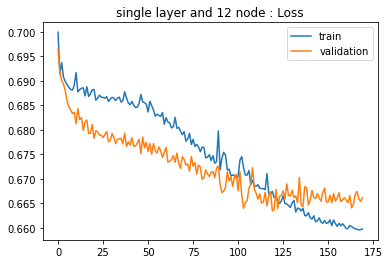

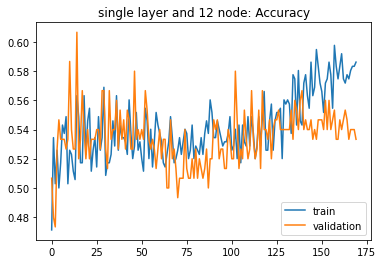

>>>>>>>>>>>>>>>>>>>> Model training with single layer and 16 node>>>>>>>>>>>>>>>>



Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 16)                48        
                                                                 
 dense_86 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.69359, saving model to tmp/Weights-001--0.69359.hdf5
11/11 [==============================] - 1s 21ms/step - loss: 0.6977 - accuracy: 0.5029 - val_loss: 0.6936 - val_accuracy: 0.5133 - lr: 0.0090
Epoch 2/1000
 1/11 [=>........

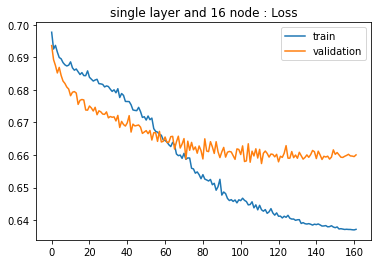

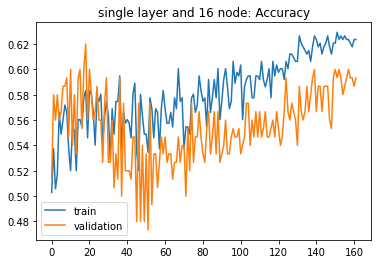

In [32]:
node_list=[4, 8, 12, 16]
Evaluation_summary=pd.DataFrame()
for node in node_list:
    print(f'>>>>>>>>>>>>>>>>>>>> Model training with single layer and {node} node>>>>>>>>>>>>>>>>')
    print('\n\n')
    NN_model, callbacks_list=create_single_hidden_layer_ann_model(input_dim=2, node_in_hidden_layer=node, checkpoint_enable=True, checkpoint_dir='tmp/')
    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_delta=1E-7, verbose=1)
    callbacks_list=callbacks_list+[rlrp]
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    callbacks_list=callbacks_list+[es]
    model = NN_model.fit(X_train, y_train, epochs=1000,  validation_data=(X_test, y_test), callbacks=callbacks_list)
    print(f"Final training loss for single layer and {node} node: {model.history['loss'][-1]}")
    print(f"Final training accuracy for single layer and {node} node {model.history['accuracy'][-1]}")
    print(f"Final validation loss for single layer and {node} node {model.history['val_loss'][-1]}")
    print(f"Final validation accuracy for single layer and {node} node {model.history['val_accuracy'][-1]}")
    Evaluation_summary=Evaluation_summary.append(pd.DataFrame({'NumOfHiddenLayer':[1], 'NumOfNode':[node], \
                'Train Loss':[model.history['loss'][-1]], 'Train Accuracy': [model.history['accuracy'][-1]], \
                    'Validation Loss':[model.history['val_loss'][-1]], 'Validation Accuracy': [model.history['val_accuracy'][-1]]}), ignore_index=True)
    
    plt.title(f'single layer and {node} node : Loss')
    plt.plot(model.history['loss'], label='train')
    plt.plot(model.history['val_loss'], label='validation')
    plt.legend()
    plt.show()
    plt.title(f'single layer and {node} node: Accuracy')
    plt.plot(model.history['accuracy'], label='train')
    plt.plot(model.history['val_accuracy'], label='validation')
    plt.legend()
    plt.show()

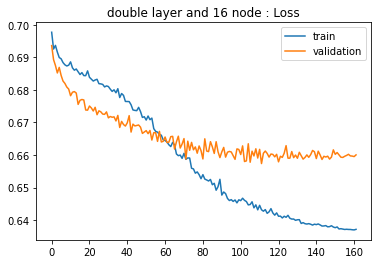

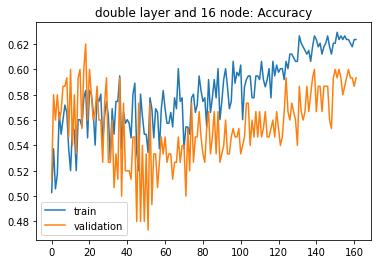

In [33]:
plt.title(f'double layer and {node} node : Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'double layer and {node} node: Accuracy')
plt.plot(model.history['accuracy'], label='train')
plt.plot(model.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

#### Summary of Results for single hidden layer

In [34]:
Evaluation_summary

NumOfHiddenLayer  NumOfNode  Train Loss  Train Accuracy  Validation Loss  \
0                 1          4    0.680370        0.525862         0.680409   
1                 1          8    0.665524        0.594828         0.668044   
2                 1         12    0.659750        0.586207         0.666121   
3                 1         16    0.637188        0.623563         0.660045   

   Validation Accuracy  
0             0.506667  
1             0.533333  
2             0.533333  
3             0.593333

Observation: As num of nodes in single hidden layer increasing, model performance is better for both training as well as validation though its accuracy is not very good as it is difficult to create model for Non linear region using single hidden layer.

### Model building with double Hidden Layer

Model is created with all permutation from the given list (4,8,12,16) in double hidden layer. so there will be 16 model.


In [35]:
def create_double_hidden_layer_ann_model(input_dim:int, nodes_in_hidden_layers:int, \
                                         checkpoint_enable:bool=False, checkpoint_dir:str=''):

    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Input(input_dim))
    # The Hidden Layer :
    # Layer 1
    NN_model.add(Dense(nodes_in_hidden_layers[0], activation='relu', activity_regularizer=tf.keras.regularizers.L1(0.001)))
    # NN_model.add(Dropout(rate=0.1))
    #Layer 2
    NN_model.add(Dense(nodes_in_hidden_layers[1], activation='relu', activity_regularizer=tf.keras.regularizers.L1(0.001)))
    # NN_model.add(Dropout(rate=0.1))
    # The Output Layer :
    NN_model.add(Dense(1, activation='sigmoid'))
    
    print(NN_model.summary())
    adam=Adam(learning_rate=0.009)
#     sgd=SGD(lr=0.001, momentum=0.9)
    # Compile the network :
    NN_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Define a checkpoint
    if checkpoint_enable:
        checkpoint_name = checkpoint_dir+'/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
        checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
        callbacks_list = [checkpoint]
    else: callbacks_list =None
    return NN_model, callbacks_list
    

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [4, 4] node>>>>>>>>>>>>>>>>



Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 4)                 12        
                                                                 
 dense_88 (Dense)            (None, 4)                 20        
                                                                 
 dense_89 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.69182, saving model to tmp/Weights-001--0.69182.hdf5
11/11 [=======================

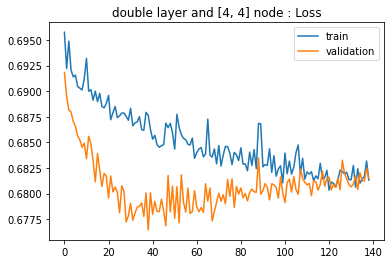

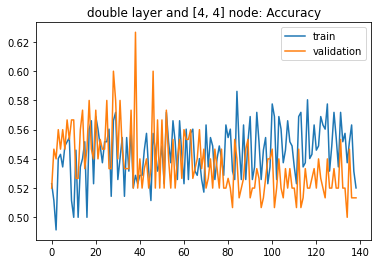

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [4, 8] node>>>>>>>>>>>>>>>>



Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 4)                 12        
                                                                 
 dense_91 (Dense)            (None, 8)                 40        
                                                                 
 dense_92 (Dense)            (None, 1)                 9         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 5s - loss: 0.6967 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.70534, saving model to tmp/Weights-001--0.70534.hdf5
11/11 [=======================

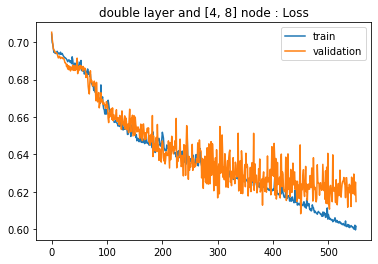

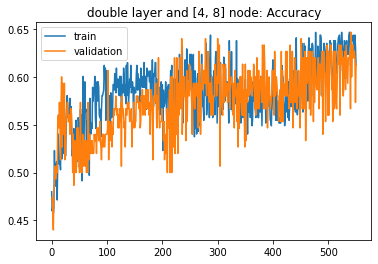

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [4, 12] node>>>>>>>>>>>>>>>>



Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 4)                 12        
                                                                 
 dense_94 (Dense)            (None, 12)                60        
                                                                 
 dense_95 (Dense)            (None, 1)                 13        
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.69112, saving model to tmp/Weights-001--0.69112.hdf5
11/11 [======================

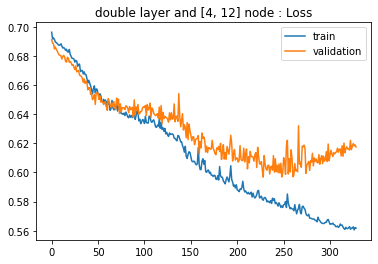

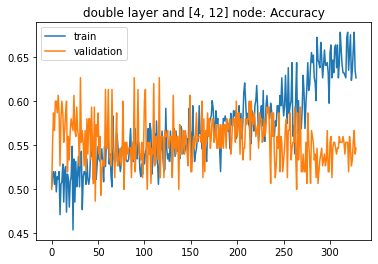

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [4, 16] node>>>>>>>>>>>>>>>>



Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 4)                 12        
                                                                 
 dense_97 (Dense)            (None, 16)                80        
                                                                 
 dense_98 (Dense)            (None, 1)                 17        
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 5s - loss: 0.6930 - accuracy: 0.5312
Epoch 1: val_loss improved from inf to 0.69507, saving model to tmp/Weights-001--0.69507.hdf5
11/11 [====================

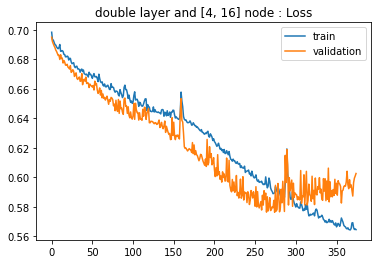

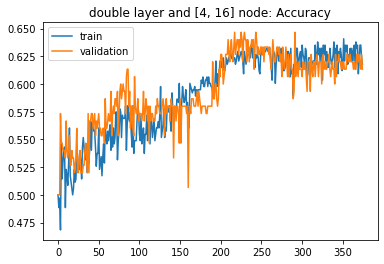

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [8, 4] node>>>>>>>>>>>>>>>>



Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 8)                 24        
                                                                 
 dense_100 (Dense)           (None, 4)                 36        
                                                                 
 dense_101 (Dense)           (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 5s - loss: 0.7019 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 0.69280, saving model to tmp/Weights-001--0.69280.hdf5
11/11 [=======================

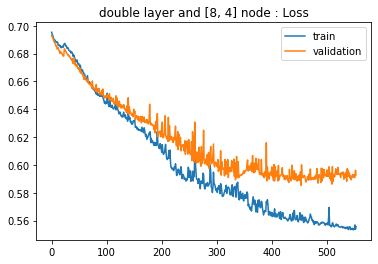

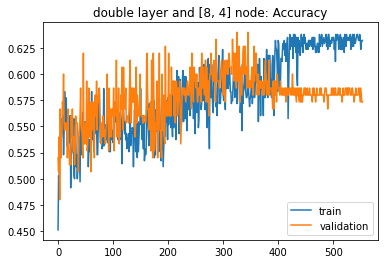

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [8, 8] node>>>>>>>>>>>>>>>>



Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 8)                 24        
                                                                 
 dense_103 (Dense)           (None, 8)                 72        
                                                                 
 dense_104 (Dense)           (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 8s - loss: 0.6945 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.70189, saving model to tmp/Weights-001--0.70189.hdf5
11/11 [=====================

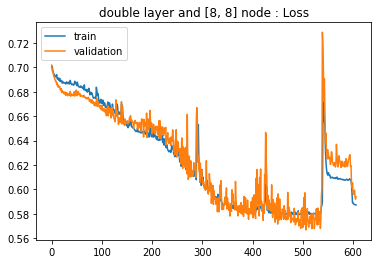

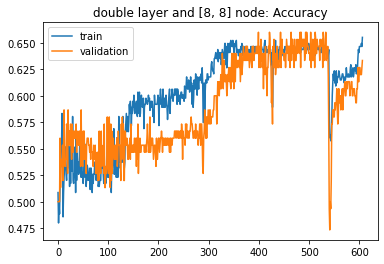

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [8, 12] node>>>>>>>>>>>>>>>>



Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 8)                 24        
                                                                 
 dense_106 (Dense)           (None, 12)                108       
                                                                 
 dense_107 (Dense)           (None, 1)                 13        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.69562, saving model to tmp/Weights-001--0.69562.hdf5
11/11 [====================

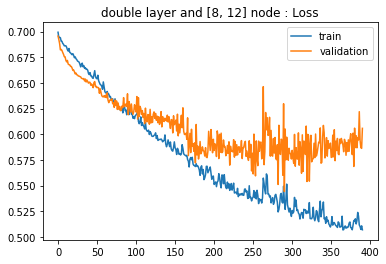

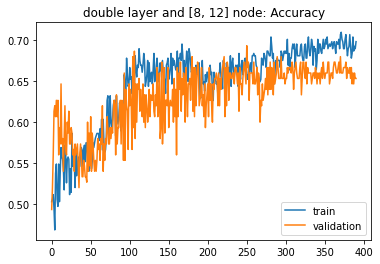

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [8, 16] node>>>>>>>>>>>>>>>>



Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 8)                 24        
                                                                 
 dense_109 (Dense)           (None, 16)                144       
                                                                 
 dense_110 (Dense)           (None, 1)                 17        
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6980 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 0.69112, saving model to tmp/Weights-001--0.69112.hdf5
11/11 [====================

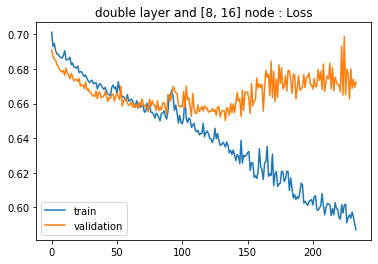

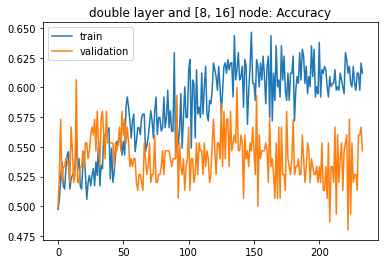

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [12, 4] node>>>>>>>>>>>>>>>>



Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 12)                36        
                                                                 
 dense_112 (Dense)           (None, 4)                 52        
                                                                 
 dense_113 (Dense)           (None, 1)                 5         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 6s - loss: 0.7008 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 0.69419, saving model to tmp/Weights-001--0.69419.hdf5
11/11 [======================

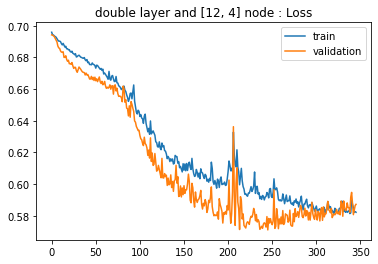

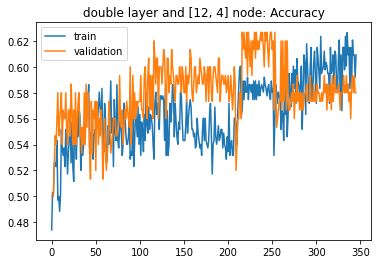

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [12, 8] node>>>>>>>>>>>>>>>>



Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 12)                36        
                                                                 
 dense_115 (Dense)           (None, 8)                 104       
                                                                 
 dense_116 (Dense)           (None, 1)                 9         
                                                                 
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6950 - accuracy: 0.3750
Epoch 1: val_loss improved from inf to 0.69132, saving model to tmp/Weights-001--0.69132.hdf5
11/11 [====================

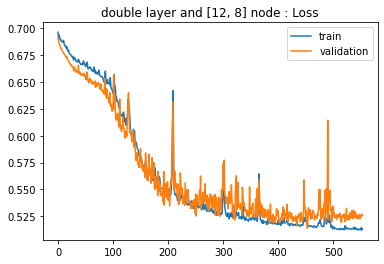

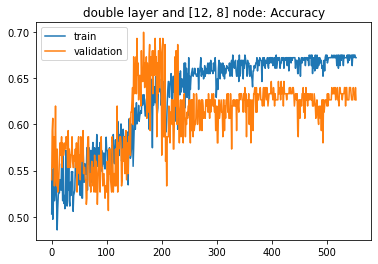

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [12, 12] node>>>>>>>>>>>>>>>>



Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 12)                36        
                                                                 
 dense_118 (Dense)           (None, 12)                156       
                                                                 
 dense_119 (Dense)           (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.69193, saving model to tmp/Weights-001--0.69193.hdf5
11/11 [===================

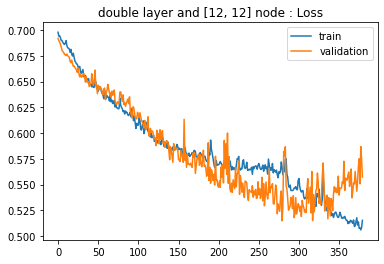

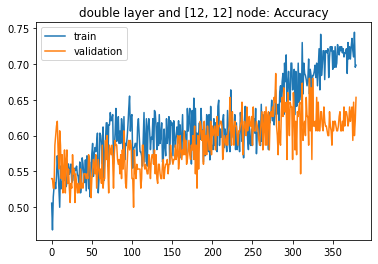

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [12, 16] node>>>>>>>>>>>>>>>>



Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 12)                36        
                                                                 
 dense_121 (Dense)           (None, 16)                208       
                                                                 
 dense_122 (Dense)           (None, 1)                 17        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6950 - accuracy: 0.3750
Epoch 1: val_loss improved from inf to 0.69437, saving model to tmp/Weights-001--0.69437.hdf5
11/11 [===================

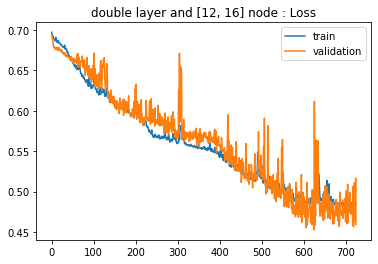

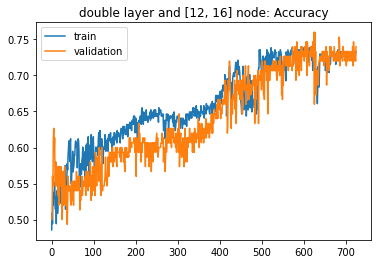

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [16, 4] node>>>>>>>>>>>>>>>>



Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 16)                48        
                                                                 
 dense_124 (Dense)           (None, 4)                 68        
                                                                 
 dense_125 (Dense)           (None, 1)                 5         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6999 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 0.69525, saving model to tmp/Weights-001--0.69525.hdf5
11/11 [====================

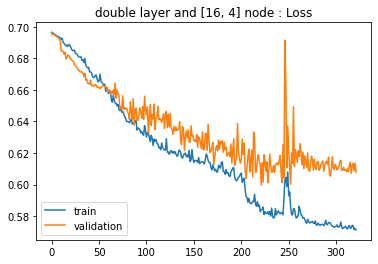

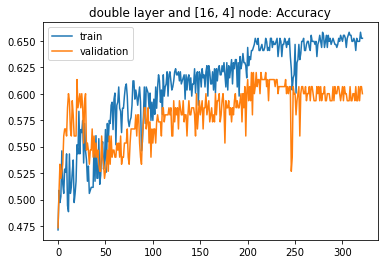

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [16, 8] node>>>>>>>>>>>>>>>>



Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 16)                48        
                                                                 
 dense_127 (Dense)           (None, 8)                 136       
                                                                 
 dense_128 (Dense)           (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6967 - accuracy: 0.4062
Epoch 1: val_loss improved from inf to 0.69199, saving model to tmp/Weights-001--0.69199.hdf5
11/11 [====================

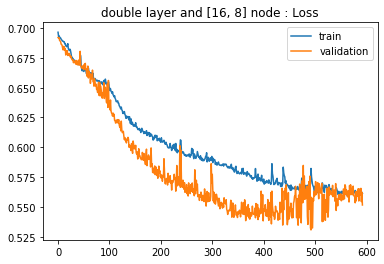

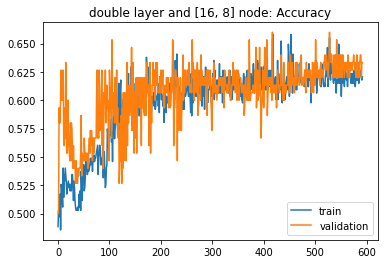

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [16, 12] node>>>>>>>>>>>>>>>>



Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 16)                48        
                                                                 
 dense_130 (Dense)           (None, 12)                204       
                                                                 
 dense_131 (Dense)           (None, 1)                 13        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.69493, saving model to tmp/Weights-001--0.69493.hdf5
11/11 [===================

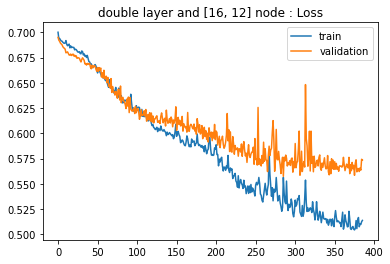

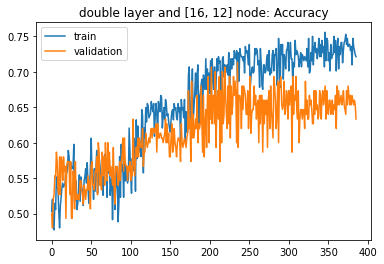

>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [16, 16] node>>>>>>>>>>>>>>>>



Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 16)                48        
                                                                 
 dense_133 (Dense)           (None, 16)                272       
                                                                 
 dense_134 (Dense)           (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 0.69358, saving model to tmp/Weights-001--0.69358.hdf5
11/11 [===================

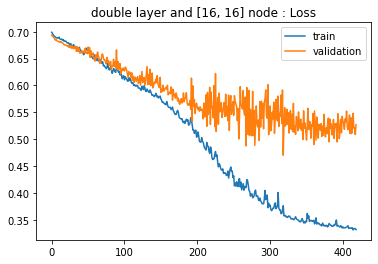

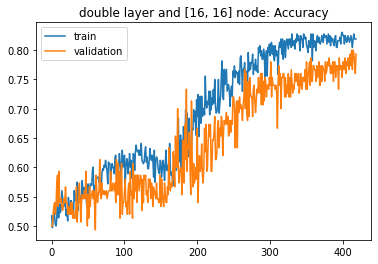

In [36]:
node_list=[4, 8, 12, 16]
Evaluation_summary=pd.DataFrame()
for node1 in node_list:
    for node2 in node_list:
        node=[node1, node2]
        print(f'>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and {node} node>>>>>>>>>>>>>>>>')
        print('\n\n')
        NN_model, callbacks_list=create_double_hidden_layer_ann_model(input_dim=2, nodes_in_hidden_layers=node, checkpoint_enable=True, checkpoint_dir='tmp/')
        rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=50, min_delta=1E-7, verbose=1)
        callbacks_list=callbacks_list+[rlrp]
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
        callbacks_list=callbacks_list+[es]
        model = NN_model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=callbacks_list)
        print(f"Final training loss for double layer and {node} nodes: {model.history['loss'][-1]}")
        print(f"Final training accuracy for double layer and {node} nodes {model.history['accuracy'][-1]}")
        print(f"Final validation loss for double layer and {node} nodes {model.history['val_loss'][-1]}")
        print(f"Final validation accuracy for double layer and {node} nodes {model.history['val_accuracy'][-1]}")
        Evaluation_summary=Evaluation_summary.append(pd.DataFrame({'NumOfHiddenLayer':[2], 'NumOfNode':[node], \
                    'Train Loss':[model.history['loss'][-1]], 'Train Accuracy': [model.history['accuracy'][-1]], \
                        'Validation Loss':[model.history['val_loss'][-1]], 'Validation Accuracy': [model.history['val_accuracy'][-1]]}), ignore_index=True)

        plt.title(f'double layer and {node} node : Loss')
        plt.plot(model.history['loss'], label='train')
        plt.plot(model.history['val_loss'], label='validation')
        plt.legend()
        plt.show()
        plt.title(f'double layer and {node} node: Accuracy')
        plt.plot(model.history['accuracy'], label='train')
        plt.plot(model.history['val_accuracy'], label='validation')
        plt.legend()
        plt.show()

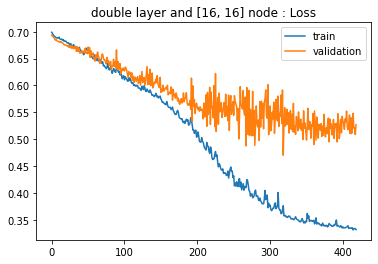

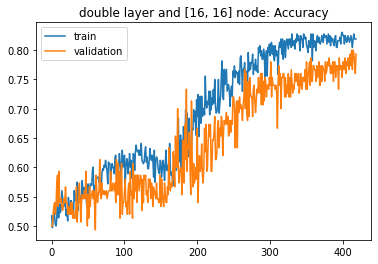

In [37]:
plt.title(f'double layer and {node} node : Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'double layer and {node} node: Accuracy')
plt.plot(model.history['accuracy'], label='train')
plt.plot(model.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

#### Summary of result for various configuration of Model

In [38]:
Evaluation_summary

NumOfHiddenLayer NumOfNode  Train Loss  Train Accuracy  Validation Loss  \
0                  2    [4, 4]    0.681313        0.520115         0.681498   
1                  2    [4, 8]    0.601536        0.612069         0.614840   
2                  2   [4, 12]    0.561766        0.626437         0.617553   
3                  2   [4, 16]    0.564583        0.617816         0.602674   
4                  2    [8, 4]    0.555622        0.632184         0.592827   
5                  2    [8, 8]    0.587138        0.655172         0.593956   
6                  2   [8, 12]    0.506985        0.698276         0.605780   
7                  2   [8, 16]    0.586998        0.612069         0.672322   
8                  2   [12, 4]    0.582238        0.609195         0.587244   
9                  2   [12, 8]    0.513076        0.672414         0.525696   
10                 2  [12, 12]    0.515209        0.698276         0.557281   
11                 2  [12, 16]    0.484773        0.732759         0.459309   
12                 2   [16, 4]    0.571260        0.652299         0.607880   
13                 2   [16, 8]    0.561312        0.620690         0.551639   
14                 2  [16, 12]    0.513899        0.721264         0.573594   
15                 2  [16, 16]    0.331929        0.818965         0.527205   

    Validation Accuracy  
0              0.513333  
1              0.613333  
2              0.546667  
3              0.613333  
4              0.573333  
5              0.633333  
6              0.653333  
7              0.546667  
8              0.580000  
9              0.626667  
10             0.653333  
11             0.740000  
12             0.600000  
13             0.633333  
14             0.633333  
15             0.793333

Observation: 
    <li> In double layer, layer with atleast 16 node in one of the layer is giving higher accuracy in most cases. </li> 
    <li>In addition model with (8,12) and (12,12) is also giving  comparable performance with respect to 16 node layers. </li>
    <li>Combination with 4 node in a layer giving lower accuracy.</li>

In [39]:
testLoss, testAccuracy = NN_model.evaluate( X_test, y_test)
print('loss and accuracy for validation set are {testLoss} and {testAccuracy}')

5/5 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7933
loss and accuracy for validation set are {testLoss} and {testAccuracy}


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = NN_model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = (y_pred > 0.5).astype(np.int)
cm=confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test, y_pred)
print(clReport)

Confusion matrix:
[[71  4]
 [27 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        75
           1       0.92      0.64      0.76        75

    accuracy                           0.79       150
   macro avg       0.82      0.79      0.79       150
weighted avg       0.82      0.79      0.79       150



### Conclusion:

Model with (16,16) configuration giving an accuracy of 0.79 with good f1-score. 

For (16,16), result are : final loss: 0.5272 and final accuracy: 0.793 and for (4,4), result are final loss: 0.68 and final accuracy: 0.51

### Feature transformation

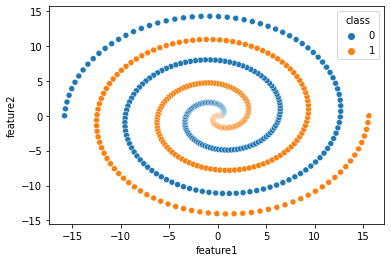

In [41]:
sns.scatterplot(x='feature1', y='feature2', hue='class', data=data)

As data is spiral in shape, we need to transform to a manageable function so that minimum architecture is required to apply NN model.

In this we used sperical coordinate system to convert this region from (x,y) to (r, theta) where 
r is sum of square of input features and theta is tan inverse of given features. Further simplifying (transformation using exp and sin inverse function) into linear region was resulting in loss of information (data points).

In [42]:
data['feature_transformed1']=(data['feature1'])**2 + (data['feature2'])**2
data['feature_transformed2']=np.arctan(data['feature1']+0.01)/(data['feature2']+0.01)

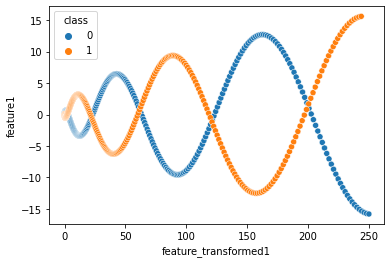

In [43]:
sns.scatterplot(x='feature_transformed1', y='feature1', hue='class', data=data)

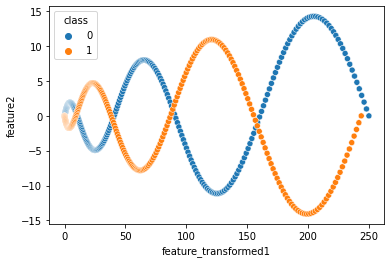

In [44]:
sns.scatterplot(x='feature_transformed1', y='feature2', hue='class', data=data)

In [45]:
data[data['feature_transformed1'].isnull()].head()

Empty DataFrame
Columns: [feature1, feature2, class, feature_transformed1, feature_transformed2]
Index: []

In [46]:
data[data['feature_transformed2'].isnull()].head()

Empty DataFrame
Columns: [feature1, feature2, class, feature_transformed1, feature_transformed2]
Index: []

In [47]:
data.describe()

feature1      feature2       class  feature_transformed1  \
count  498.000000  4.980000e+02  498.000000            498.000000   
mean    -0.000528  1.270753e-02    0.502008             82.752795   
std      6.477553  6.400034e+00    0.500499             73.936667   
min    -15.807963 -1.407123e+01    0.000000              0.000685   
25%     -3.930364 -4.177892e+00    0.000000             15.691776   
50%      0.023080  5.804950e-13    1.000000             62.182169   
75%      4.001632  4.114817e+00    1.000000            139.472544   
max     15.607963  1.427091e+01    1.000000            249.891703   

       feature_transformed2  
count            498.000000  
mean               0.202236  
std                9.939104  
min             -150.758137  
25%               -0.263067  
50%               -0.006755  
75%                0.300979  
max              150.685478

### Data Preprocessing

Splitting the data into two parts 70% for training and 30% for validation


In [48]:
Predictor=data.loc[:,['feature1', 'feature2', 'feature_transformed1', 'feature_transformed2']].values
Target=data.loc[:,'class'].values

X_train, X_test, y_train, y_test = train_test_split(Predictor, Target, test_size=0.3, random_state=42, stratify=Target)


#### Model Building

In this we have used model with (4,8) nodes with 2 hidden layers and its performance is comparable to  model with 16 nodes in one of the layer and without feature transformation.

In [52]:
Evaluation_summary=pd.DataFrame()
node=[4, 8]
print(f'>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and {node} node>>>>>>>>>>>>>>>>')
print('\n\n')
NN_model, callbacks_list=create_double_hidden_layer_ann_model(input_dim=4, nodes_in_hidden_layers=node, checkpoint_enable=True, checkpoint_dir='tmp/')
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=50, min_delta=1E-7, verbose=1)
callbacks_list=callbacks_list+[rlrp]
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
callbacks_list=callbacks_list+[es]
model = NN_model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=callbacks_list)

print(f"Final training accuracy for single layer and {node} nodes {model.history['accuracy'][-1]}")
print(f"Final validation loss for single layer and {node} nodes {model.history['val_loss'][-1]}")
print(f"Final validation accuracy for single layer and {node} nodes {model.history['val_accuracy'][-1]}")
Evaluation_summary=Evaluation_summary.append(pd.DataFrame({'NumOfHiddenLayer':[1], 'NumOfNode':[node], \
    'Train Loss':[model.history['loss'][-1]], 'Train Accuracy': [model.history['accuracy'][-1]], \
        'Validation Loss':[model.history['val_loss'][-1]], 'Validation Accuracy': [model.history['val_accuracy'][-1]]}), ignore_index=True)



>>>>>>>>>>>>>>>>>>>> Model training with double hidden layer and [4, 8] node>>>>>>>>>>>>>>>>



Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_141 (Dense)           (None, 4)                 20        
                                                                 
 dense_142 (Dense)           (None, 8)                 40        
                                                                 
 dense_143 (Dense)           (None, 1)                 9         
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 1/11 [=>............................] - ETA: 5s - loss: 8.1486 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 1.52395, saving model to tmp/Weights-001--1.52395.hdf5
11/11 [=======================

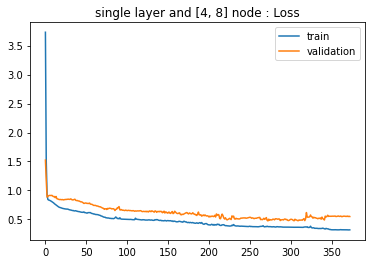

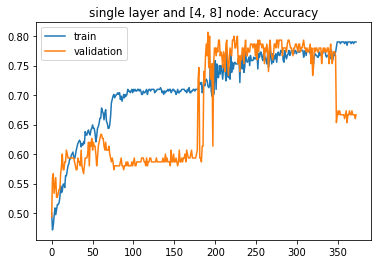

In [53]:
plt.title(f'single layer and {node} node : Loss')
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='validation')
plt.legend()
plt.show()
plt.title(f'single layer and {node} node: Accuracy')
plt.plot(model.history['accuracy'], label='train')
plt.plot(model.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [54]:
Evaluation_summary

NumOfHiddenLayer NumOfNode  Train Loss  Train Accuracy  Validation Loss  \
0                 1    [4, 8]     0.31907         0.79023         0.549548   

   Validation Accuracy  
0             0.666667

In [55]:
testLoss, testAccuracy = NN_model.evaluate( X_test, y_test)
print('loss and accuracy for validation set are {testLoss} and {testAccuracy}')

5/5 [==============================] - 0s 4ms/step - loss: 0.5495 - accuracy: 0.6667
loss and accuracy for validation set are {testLoss} and {testAccuracy}


In [56]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = NN_model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = (y_pred > 0.5).astype(np.int)
cm=confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:')
print(cm)
print(f'Classification Report:')
clReport=classification_report(y_test, y_pred)
print(clReport)

Confusion matrix:
[[74  1]
 [49 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.99      0.75        75
           1       0.96      0.35      0.51        75

    accuracy                           0.67       150
   macro avg       0.78      0.67      0.63       150
weighted avg       0.78      0.67      0.63       150



#### Conclusion:
   With feature transformation, we require less nodes in the network architecture to achieve better results as compared to models without feature transformation.